In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/sarot/anaconda3/envs/py3tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [9]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [10]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(4, 3) dtype=float32>

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-6).minimize(cost)

In [12]:
session.run(tf.global_variables_initializer())

In [13]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [14]:
print (y_true.shape)

(?, 3)


In [15]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]

In [16]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [17]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.34477443
[2]
Train Accuracy :  0.3447665
[3]
Train Accuracy :  0.34475857
[4]
Train Accuracy :  0.34475064
[5]
Train Accuracy :  0.3447427
[6]
Train Accuracy :  0.3447348
[7]
Train Accuracy :  0.34472686
[8]
Train Accuracy :  0.34471896
[9]
Train Accuracy :  0.344711
[10]
Train Accuracy :  0.34470308
[11]
Train Accuracy :  0.34469518
[12]
Train Accuracy :  0.34468722
[13]
Train Accuracy :  0.34467933
[14]
Train Accuracy :  0.34467137
[15]
Train Accuracy :  0.34466344
[16]
Train Accuracy :  0.3446555
[17]
Train Accuracy :  0.3446476
[18]
Train Accuracy :  0.34463963
[19]
Train Accuracy :  0.34463173
[20]
Train Accuracy :  0.3446238
[21]
Train Accuracy :  0.34461588
[22]
Train Accuracy :  0.34460795
[23]
Train Accuracy :  0.34460002
[24]
Train Accuracy :  0.3445921
[25]
Train Accuracy :  0.34458417
[26]
Train Accuracy :  0.34457624
[27]
Train Accuracy :  0.3445683
[28]
Train Accuracy :  0.34456038
[29]
Train Accuracy :  0.3445525
[30]
Train Accuracy :  0.34454456


[273]
Train Accuracy :  0.3426231
[274]
Train Accuracy :  0.34261525
[275]
Train Accuracy :  0.34260738
[276]
Train Accuracy :  0.34259948
[277]
Train Accuracy :  0.34259158
[278]
Train Accuracy :  0.3425837
[279]
Train Accuracy :  0.3425758
[280]
Train Accuracy :  0.34256792
[281]
Train Accuracy :  0.34256005
[282]
Train Accuracy :  0.34255216
[283]
Train Accuracy :  0.34254426
[284]
Train Accuracy :  0.34253636
[285]
Train Accuracy :  0.3425285
[286]
Train Accuracy :  0.3425206
[287]
Train Accuracy :  0.3425127
[288]
Train Accuracy :  0.34250483
[289]
Train Accuracy :  0.34249693
[290]
Train Accuracy :  0.34248903
[291]
Train Accuracy :  0.34248114
[292]
Train Accuracy :  0.34247327
[293]
Train Accuracy :  0.3424654
[294]
Train Accuracy :  0.34245747
[295]
Train Accuracy :  0.3424496
[296]
Train Accuracy :  0.3424417
[297]
Train Accuracy :  0.34243384
[298]
Train Accuracy :  0.34242594
[299]
Train Accuracy :  0.34241804
[300]
Train Accuracy :  0.34241018
[301]
Train Accuracy :  0.342

[554]
Train Accuracy :  0.34041172
[555]
Train Accuracy :  0.34040385
[556]
Train Accuracy :  0.34039602
[557]
Train Accuracy :  0.34038812
[558]
Train Accuracy :  0.3403803
[559]
Train Accuracy :  0.34037244
[560]
Train Accuracy :  0.3403646
[561]
Train Accuracy :  0.34035677
[562]
Train Accuracy :  0.3403489
[563]
Train Accuracy :  0.34034106
[564]
Train Accuracy :  0.3403332
[565]
Train Accuracy :  0.34032536
[566]
Train Accuracy :  0.3403175
[567]
Train Accuracy :  0.34030965
[568]
Train Accuracy :  0.3403018
[569]
Train Accuracy :  0.3402939
[570]
Train Accuracy :  0.3402861
[571]
Train Accuracy :  0.34027824
[572]
Train Accuracy :  0.3402704
[573]
Train Accuracy :  0.34026253
[574]
Train Accuracy :  0.3402547
[575]
Train Accuracy :  0.34024683
[576]
Train Accuracy :  0.34023896
[577]
Train Accuracy :  0.34023112
[578]
Train Accuracy :  0.34022328
[579]
Train Accuracy :  0.3402154
[580]
Train Accuracy :  0.34020758
[581]
Train Accuracy :  0.3401997
[582]
Train Accuracy :  0.340191

[844]
Train Accuracy :  0.3381376
[845]
Train Accuracy :  0.33812973
[846]
Train Accuracy :  0.3381219
[847]
Train Accuracy :  0.33811405
[848]
Train Accuracy :  0.33810624
[849]
Train Accuracy :  0.3380984
[850]
Train Accuracy :  0.33809057
[851]
Train Accuracy :  0.33808276
[852]
Train Accuracy :  0.33807492
[853]
Train Accuracy :  0.3380671
[854]
Train Accuracy :  0.33805925
[855]
Train Accuracy :  0.33805144
[856]
Train Accuracy :  0.33804363
[857]
Train Accuracy :  0.33803576
[858]
Train Accuracy :  0.33802792
[859]
Train Accuracy :  0.33802015
[860]
Train Accuracy :  0.33801228
[861]
Train Accuracy :  0.33800444
[862]
Train Accuracy :  0.33799663
[863]
Train Accuracy :  0.33798876
[864]
Train Accuracy :  0.337981
[865]
Train Accuracy :  0.33797315
[866]
Train Accuracy :  0.3379653
[867]
Train Accuracy :  0.33795747
[868]
Train Accuracy :  0.33794963
[869]
Train Accuracy :  0.33794183
[870]
Train Accuracy :  0.337934
[871]
Train Accuracy :  0.33792618
[872]
Train Accuracy :  0.337

[1121]
Train Accuracy :  0.3360161
[1122]
Train Accuracy :  0.33600888
[1123]
Train Accuracy :  0.33600163
[1124]
Train Accuracy :  0.3359944
[1125]
Train Accuracy :  0.33598712
[1126]
Train Accuracy :  0.33597988
[1127]
Train Accuracy :  0.33597264
[1128]
Train Accuracy :  0.3359654
[1129]
Train Accuracy :  0.33595812
[1130]
Train Accuracy :  0.33595088
[1131]
Train Accuracy :  0.33594367
[1132]
Train Accuracy :  0.3359364
[1133]
Train Accuracy :  0.33592916
[1134]
Train Accuracy :  0.33592194
[1135]
Train Accuracy :  0.33591467
[1136]
Train Accuracy :  0.33590743
[1137]
Train Accuracy :  0.3359002
[1138]
Train Accuracy :  0.33589298
[1139]
Train Accuracy :  0.33588573
[1140]
Train Accuracy :  0.33587846
[1141]
Train Accuracy :  0.33587122
[1142]
Train Accuracy :  0.33586398
[1143]
Train Accuracy :  0.33585674
[1144]
Train Accuracy :  0.33584952
[1145]
Train Accuracy :  0.33584225
[1146]
Train Accuracy :  0.335835
[1147]
Train Accuracy :  0.33582777
[1148]
Train Accuracy :  0.33582053

[1395]
Train Accuracy :  0.33403307
[1396]
Train Accuracy :  0.3340258
[1397]
Train Accuracy :  0.3340186
[1398]
Train Accuracy :  0.33401135
[1399]
Train Accuracy :  0.33400407
[1400]
Train Accuracy :  0.33399686
[1401]
Train Accuracy :  0.33398962
[1402]
Train Accuracy :  0.33398238
[1403]
Train Accuracy :  0.33397514
[1404]
Train Accuracy :  0.33396786
[1405]
Train Accuracy :  0.33396065
[1406]
Train Accuracy :  0.3339534
[1407]
Train Accuracy :  0.33394614
[1408]
Train Accuracy :  0.3339389
[1409]
Train Accuracy :  0.33393165
[1410]
Train Accuracy :  0.3339244
[1411]
Train Accuracy :  0.33391717
[1412]
Train Accuracy :  0.3339099
[1413]
Train Accuracy :  0.3339027
[1414]
Train Accuracy :  0.33389544
[1415]
Train Accuracy :  0.3338882
[1416]
Train Accuracy :  0.33388096
[1417]
Train Accuracy :  0.33387372
[1418]
Train Accuracy :  0.33386648
[1419]
Train Accuracy :  0.3338592
[1420]
Train Accuracy :  0.33385196
[1421]
Train Accuracy :  0.33384472
[1422]
Train Accuracy :  0.33383748
[

[1670]
Train Accuracy :  0.3320379
[1671]
Train Accuracy :  0.33203062
[1672]
Train Accuracy :  0.33202335
[1673]
Train Accuracy :  0.33201608
[1674]
Train Accuracy :  0.33200884
[1675]
Train Accuracy :  0.33200157
[1676]
Train Accuracy :  0.33199427
[1677]
Train Accuracy :  0.33198702
[1678]
Train Accuracy :  0.33197972
[1679]
Train Accuracy :  0.33197248
[1680]
Train Accuracy :  0.3319652
[1681]
Train Accuracy :  0.33195794
[1682]
Train Accuracy :  0.33195066
[1683]
Train Accuracy :  0.3319434
[1684]
Train Accuracy :  0.33193618
[1685]
Train Accuracy :  0.33192903
[1686]
Train Accuracy :  0.33192188
[1687]
Train Accuracy :  0.3319147
[1688]
Train Accuracy :  0.33190754
[1689]
Train Accuracy :  0.33190036
[1690]
Train Accuracy :  0.33189327
[1691]
Train Accuracy :  0.33188608
[1692]
Train Accuracy :  0.33187896
[1693]
Train Accuracy :  0.33187178
[1694]
Train Accuracy :  0.33186466
[1695]
Train Accuracy :  0.3318575
[1696]
Train Accuracy :  0.33185035
[1697]
Train Accuracy :  0.331843

[1956]
Train Accuracy :  0.3300115
[1957]
Train Accuracy :  0.33000448
[1958]
Train Accuracy :  0.32999748
[1959]
Train Accuracy :  0.3299905
[1960]
Train Accuracy :  0.32998353
[1961]
Train Accuracy :  0.32997653
[1962]
Train Accuracy :  0.32996953
[1963]
Train Accuracy :  0.32996252
[1964]
Train Accuracy :  0.32995555
[1965]
Train Accuracy :  0.32994854
[1966]
Train Accuracy :  0.32994154
[1967]
Train Accuracy :  0.3299346
[1968]
Train Accuracy :  0.32992756
[1969]
Train Accuracy :  0.3299206
[1970]
Train Accuracy :  0.3299136
[1971]
Train Accuracy :  0.32990658
[1972]
Train Accuracy :  0.32989958
[1973]
Train Accuracy :  0.32989258
[1974]
Train Accuracy :  0.3298856
[1975]
Train Accuracy :  0.3298786
[1976]
Train Accuracy :  0.32987162
[1977]
Train Accuracy :  0.32986462
[1978]
Train Accuracy :  0.32985762
[1979]
Train Accuracy :  0.3298506
[1980]
Train Accuracy :  0.3298436
[1981]
Train Accuracy :  0.32983664
[1982]
Train Accuracy :  0.32982963
[1983]
Train Accuracy :  0.32982263
[

[2245]
Train Accuracy :  0.32799113
[2246]
Train Accuracy :  0.32798415
[2247]
Train Accuracy :  0.32797715
[2248]
Train Accuracy :  0.3279702
[2249]
Train Accuracy :  0.3279632
[2250]
Train Accuracy :  0.3279562
[2251]
Train Accuracy :  0.3279492
[2252]
Train Accuracy :  0.32794225
[2253]
Train Accuracy :  0.32793525
[2254]
Train Accuracy :  0.32792825
[2255]
Train Accuracy :  0.32792127
[2256]
Train Accuracy :  0.32791427
[2257]
Train Accuracy :  0.32790726
[2258]
Train Accuracy :  0.32790032
[2259]
Train Accuracy :  0.32789332
[2260]
Train Accuracy :  0.3278863
[2261]
Train Accuracy :  0.32787934
[2262]
Train Accuracy :  0.32787234
[2263]
Train Accuracy :  0.32786536
[2264]
Train Accuracy :  0.32785836
[2265]
Train Accuracy :  0.32785136
[2266]
Train Accuracy :  0.32784438
[2267]
Train Accuracy :  0.32783738
[2268]
Train Accuracy :  0.32783037
[2269]
Train Accuracy :  0.32782337
[2270]
Train Accuracy :  0.3278164
[2271]
Train Accuracy :  0.32780945
[2272]
Train Accuracy :  0.3278024

[2538]
Train Accuracy :  0.32594752
[2539]
Train Accuracy :  0.32594055
[2540]
Train Accuracy :  0.32593358
[2541]
Train Accuracy :  0.32592663
[2542]
Train Accuracy :  0.32591966
[2543]
Train Accuracy :  0.3259127
[2544]
Train Accuracy :  0.32590574
[2545]
Train Accuracy :  0.32589877
[2546]
Train Accuracy :  0.3258918
[2547]
Train Accuracy :  0.32588485
[2548]
Train Accuracy :  0.32587788
[2549]
Train Accuracy :  0.3258709
[2550]
Train Accuracy :  0.32586396
[2551]
Train Accuracy :  0.32585695
[2552]
Train Accuracy :  0.32585
[2553]
Train Accuracy :  0.32584307
[2554]
Train Accuracy :  0.32583606
[2555]
Train Accuracy :  0.32582912
[2556]
Train Accuracy :  0.32582214
[2557]
Train Accuracy :  0.3258152
[2558]
Train Accuracy :  0.3258082
[2559]
Train Accuracy :  0.32580125
[2560]
Train Accuracy :  0.32579425
[2561]
Train Accuracy :  0.32578734
[2562]
Train Accuracy :  0.32578036
[2563]
Train Accuracy :  0.3257734
[2564]
Train Accuracy :  0.32576644
[2565]
Train Accuracy :  0.32575944
[

[2810]
Train Accuracy :  0.32405537
[2811]
Train Accuracy :  0.32404837
[2812]
Train Accuracy :  0.32404146
[2813]
Train Accuracy :  0.3240345
[2814]
Train Accuracy :  0.32402754
[2815]
Train Accuracy :  0.3240206
[2816]
Train Accuracy :  0.32401365
[2817]
Train Accuracy :  0.3240067
[2818]
Train Accuracy :  0.32399973
[2819]
Train Accuracy :  0.3239928
[2820]
Train Accuracy :  0.32398587
[2821]
Train Accuracy :  0.3239789
[2822]
Train Accuracy :  0.32397196
[2823]
Train Accuracy :  0.323965
[2824]
Train Accuracy :  0.32395804
[2825]
Train Accuracy :  0.3239511
[2826]
Train Accuracy :  0.32394415
[2827]
Train Accuracy :  0.3239372
[2828]
Train Accuracy :  0.3239303
[2829]
Train Accuracy :  0.32392332
[2830]
Train Accuracy :  0.32391638
[2831]
Train Accuracy :  0.3239094
[2832]
Train Accuracy :  0.32390246
[2833]
Train Accuracy :  0.3238955
[2834]
Train Accuracy :  0.3238886
[2835]
Train Accuracy :  0.32388163
[2836]
Train Accuracy :  0.32387468
[2837]
Train Accuracy :  0.3238677
[2838]

[3090]
Train Accuracy :  0.3221098
[3091]
Train Accuracy :  0.32210284
[3092]
Train Accuracy :  0.32209593
[3093]
Train Accuracy :  0.32208896
[3094]
Train Accuracy :  0.32208204
[3095]
Train Accuracy :  0.32207507
[3096]
Train Accuracy :  0.32206813
[3097]
Train Accuracy :  0.32206118
[3098]
Train Accuracy :  0.32205424
[3099]
Train Accuracy :  0.32204726
[3100]
Train Accuracy :  0.32204032
[3101]
Train Accuracy :  0.32203338
[3102]
Train Accuracy :  0.32202643
[3103]
Train Accuracy :  0.32201952
[3104]
Train Accuracy :  0.32201254
[3105]
Train Accuracy :  0.32200563
[3106]
Train Accuracy :  0.3219987
[3107]
Train Accuracy :  0.32199174
[3108]
Train Accuracy :  0.3219848
[3109]
Train Accuracy :  0.32197785
[3110]
Train Accuracy :  0.3219709
[3111]
Train Accuracy :  0.32196397
[3112]
Train Accuracy :  0.321957
[3113]
Train Accuracy :  0.32195008
[3114]
Train Accuracy :  0.32194313
[3115]
Train Accuracy :  0.3219362
[3116]
Train Accuracy :  0.32192925
[3117]
Train Accuracy :  0.3219223


[3355]
Train Accuracy :  0.32027003
[3356]
Train Accuracy :  0.3202631
[3357]
Train Accuracy :  0.32025614
[3358]
Train Accuracy :  0.3202492
[3359]
Train Accuracy :  0.32024226
[3360]
Train Accuracy :  0.3202353
[3361]
Train Accuracy :  0.32022837
[3362]
Train Accuracy :  0.32022142
[3363]
Train Accuracy :  0.3202145
[3364]
Train Accuracy :  0.32020757
[3365]
Train Accuracy :  0.32020062
[3366]
Train Accuracy :  0.32019368
[3367]
Train Accuracy :  0.32018673
[3368]
Train Accuracy :  0.3201798
[3369]
Train Accuracy :  0.32017285
[3370]
Train Accuracy :  0.3201659
[3371]
Train Accuracy :  0.320159
[3372]
Train Accuracy :  0.320152
[3373]
Train Accuracy :  0.3201451
[3374]
Train Accuracy :  0.32013813
[3375]
Train Accuracy :  0.32013118
[3376]
Train Accuracy :  0.32012427
[3377]
Train Accuracy :  0.32011732
[3378]
Train Accuracy :  0.32011035
[3379]
Train Accuracy :  0.32010344
[3380]
Train Accuracy :  0.3200965
[3381]
Train Accuracy :  0.32008955
[3382]
Train Accuracy :  0.3200826
[3383

[3618]
Train Accuracy :  0.31844527
[3619]
Train Accuracy :  0.31843832
[3620]
Train Accuracy :  0.3184314
[3621]
Train Accuracy :  0.31842446
[3622]
Train Accuracy :  0.31841755
[3623]
Train Accuracy :  0.31841058
[3624]
Train Accuracy :  0.31840366
[3625]
Train Accuracy :  0.31839672
[3626]
Train Accuracy :  0.3183898
[3627]
Train Accuracy :  0.31838286
[3628]
Train Accuracy :  0.31837592
[3629]
Train Accuracy :  0.31836897
[3630]
Train Accuracy :  0.31836206
[3631]
Train Accuracy :  0.3183551
[3632]
Train Accuracy :  0.31834817
[3633]
Train Accuracy :  0.31834126
[3634]
Train Accuracy :  0.3183343
[3635]
Train Accuracy :  0.3183274
[3636]
Train Accuracy :  0.31832045
[3637]
Train Accuracy :  0.3183135
[3638]
Train Accuracy :  0.31830657
[3639]
Train Accuracy :  0.31829965
[3640]
Train Accuracy :  0.3182927
[3641]
Train Accuracy :  0.31828576
[3642]
Train Accuracy :  0.31827882
[3643]
Train Accuracy :  0.3182719
[3644]
Train Accuracy :  0.31826496
[3645]
Train Accuracy :  0.31825802


[3903]
Train Accuracy :  0.31646928
[3904]
Train Accuracy :  0.31646234
[3905]
Train Accuracy :  0.31645542
[3906]
Train Accuracy :  0.31644845
[3907]
Train Accuracy :  0.31644157
[3908]
Train Accuracy :  0.3164346
[3909]
Train Accuracy :  0.31642768
[3910]
Train Accuracy :  0.31642073
[3911]
Train Accuracy :  0.3164138
[3912]
Train Accuracy :  0.3164069
[3913]
Train Accuracy :  0.31639993
[3914]
Train Accuracy :  0.31639302
[3915]
Train Accuracy :  0.3163861
[3916]
Train Accuracy :  0.31637916
[3917]
Train Accuracy :  0.31637225
[3918]
Train Accuracy :  0.3163653
[3919]
Train Accuracy :  0.31635836
[3920]
Train Accuracy :  0.3163514
[3921]
Train Accuracy :  0.3163445
[3922]
Train Accuracy :  0.3163376
[3923]
Train Accuracy :  0.3163306
[3924]
Train Accuracy :  0.3163237
[3925]
Train Accuracy :  0.31631675
[3926]
Train Accuracy :  0.3163098
[3927]
Train Accuracy :  0.31630293
[3928]
Train Accuracy :  0.31629598
[3929]
Train Accuracy :  0.31628907
[3930]
Train Accuracy :  0.3162821
[393

[4163]
Train Accuracy :  0.3146674
[4164]
Train Accuracy :  0.31466046
[4165]
Train Accuracy :  0.31465352
[4166]
Train Accuracy :  0.3146466
[4167]
Train Accuracy :  0.3146397
[4168]
Train Accuracy :  0.31463277
[4169]
Train Accuracy :  0.31462583
[4170]
Train Accuracy :  0.31461892
[4171]
Train Accuracy :  0.31461197
[4172]
Train Accuracy :  0.31460506
[4173]
Train Accuracy :  0.31459808
[4174]
Train Accuracy :  0.31459117
[4175]
Train Accuracy :  0.31458423
[4176]
Train Accuracy :  0.3145773
[4177]
Train Accuracy :  0.3145704
[4178]
Train Accuracy :  0.31456348
[4179]
Train Accuracy :  0.31455654
[4180]
Train Accuracy :  0.3145496
[4181]
Train Accuracy :  0.31454268
[4182]
Train Accuracy :  0.31453577
[4183]
Train Accuracy :  0.31452882
[4184]
Train Accuracy :  0.31452188
[4185]
Train Accuracy :  0.31451496
[4186]
Train Accuracy :  0.31450802
[4187]
Train Accuracy :  0.3145011
[4188]
Train Accuracy :  0.31449416
[4189]
Train Accuracy :  0.31448725
[4190]
Train Accuracy :  0.31448033

[4453]
Train Accuracy :  0.3126588
[4454]
Train Accuracy :  0.31265184
[4455]
Train Accuracy :  0.31264493
[4456]
Train Accuracy :  0.312638
[4457]
Train Accuracy :  0.31263107
[4458]
Train Accuracy :  0.31262416
[4459]
Train Accuracy :  0.3126172
[4460]
Train Accuracy :  0.3126103
[4461]
Train Accuracy :  0.31260338
[4462]
Train Accuracy :  0.31259644
[4463]
Train Accuracy :  0.31258953
[4464]
Train Accuracy :  0.3125826
[4465]
Train Accuracy :  0.31257567
[4466]
Train Accuracy :  0.31256875
[4467]
Train Accuracy :  0.31256184
[4468]
Train Accuracy :  0.31255493
[4469]
Train Accuracy :  0.312548
[4470]
Train Accuracy :  0.3125411
[4471]
Train Accuracy :  0.31253415
[4472]
Train Accuracy :  0.31252724
[4473]
Train Accuracy :  0.3125203
[4474]
Train Accuracy :  0.31251338
[4475]
Train Accuracy :  0.31250644
[4476]
Train Accuracy :  0.31249952
[4477]
Train Accuracy :  0.31249258
[4478]
Train Accuracy :  0.3124857
[4479]
Train Accuracy :  0.31247878
[4480]
Train Accuracy :  0.31247184
[44

[4733]
Train Accuracy :  0.31072086
[4734]
Train Accuracy :  0.31071395
[4735]
Train Accuracy :  0.310707
[4736]
Train Accuracy :  0.3107001
[4737]
Train Accuracy :  0.3106932
[4738]
Train Accuracy :  0.31068626
[4739]
Train Accuracy :  0.31067935
[4740]
Train Accuracy :  0.31067243
[4741]
Train Accuracy :  0.31066552
[4742]
Train Accuracy :  0.31065857
[4743]
Train Accuracy :  0.3106517
[4744]
Train Accuracy :  0.31064475
[4745]
Train Accuracy :  0.31063783
[4746]
Train Accuracy :  0.31063092
[4747]
Train Accuracy :  0.31062397
[4748]
Train Accuracy :  0.3106171
[4749]
Train Accuracy :  0.31061018
[4750]
Train Accuracy :  0.31060326
[4751]
Train Accuracy :  0.31059632
[4752]
Train Accuracy :  0.31058943
[4753]
Train Accuracy :  0.3105825
[4754]
Train Accuracy :  0.31057557
[4755]
Train Accuracy :  0.31056866
[4756]
Train Accuracy :  0.31056175
[4757]
Train Accuracy :  0.3105548
[4758]
Train Accuracy :  0.3105479
[4759]
Train Accuracy :  0.31054097
[4760]
Train Accuracy :  0.3105341
[4

[5030]
Train Accuracy :  0.308667
[5031]
Train Accuracy :  0.3086601
[5032]
Train Accuracy :  0.30865318
[5033]
Train Accuracy :  0.30864623
[5034]
Train Accuracy :  0.30863932
[5035]
Train Accuracy :  0.30863243
[5036]
Train Accuracy :  0.30862552
[5037]
Train Accuracy :  0.3086186
[5038]
Train Accuracy :  0.3086117
[5039]
Train Accuracy :  0.30860478
[5040]
Train Accuracy :  0.30859786
[5041]
Train Accuracy :  0.30859095
[5042]
Train Accuracy :  0.30858403
[5043]
Train Accuracy :  0.30857712
[5044]
Train Accuracy :  0.3085702
[5045]
Train Accuracy :  0.3085633
[5046]
Train Accuracy :  0.3085564
[5047]
Train Accuracy :  0.3085495
[5048]
Train Accuracy :  0.30854255
[5049]
Train Accuracy :  0.30853564
[5050]
Train Accuracy :  0.30852875
[5051]
Train Accuracy :  0.30852184
[5052]
Train Accuracy :  0.30851492
[5053]
Train Accuracy :  0.30850798
[5054]
Train Accuracy :  0.3085011
[5055]
Train Accuracy :  0.30849415
[5056]
Train Accuracy :  0.30848727
[5057]
Train Accuracy :  0.30848035
[5

[5318]
Train Accuracy :  0.30667692
[5319]
Train Accuracy :  0.30667004
[5320]
Train Accuracy :  0.30666313
[5321]
Train Accuracy :  0.3066562
[5322]
Train Accuracy :  0.30664933
[5323]
Train Accuracy :  0.30664238
[5324]
Train Accuracy :  0.3066355
[5325]
Train Accuracy :  0.3066286
[5326]
Train Accuracy :  0.30662167
[5327]
Train Accuracy :  0.30661476
[5328]
Train Accuracy :  0.30660787
[5329]
Train Accuracy :  0.30660096
[5330]
Train Accuracy :  0.30659407
[5331]
Train Accuracy :  0.30658713
[5332]
Train Accuracy :  0.30658022
[5333]
Train Accuracy :  0.30657333
[5334]
Train Accuracy :  0.3065664
[5335]
Train Accuracy :  0.30655953
[5336]
Train Accuracy :  0.30655262
[5337]
Train Accuracy :  0.3065457
[5338]
Train Accuracy :  0.3065388
[5339]
Train Accuracy :  0.30653188
[5340]
Train Accuracy :  0.306525
[5341]
Train Accuracy :  0.30651808
[5342]
Train Accuracy :  0.30651116
[5343]
Train Accuracy :  0.30650425
[5344]
Train Accuracy :  0.30649734
[5345]
Train Accuracy :  0.30649042


[5611]
Train Accuracy :  0.3046538
[5612]
Train Accuracy :  0.30464688
[5613]
Train Accuracy :  0.30464
[5614]
Train Accuracy :  0.30463308
[5615]
Train Accuracy :  0.30462617
[5616]
Train Accuracy :  0.30461925
[5617]
Train Accuracy :  0.30461237
[5618]
Train Accuracy :  0.30460548
[5619]
Train Accuracy :  0.30459857
[5620]
Train Accuracy :  0.30459166
[5621]
Train Accuracy :  0.30458477
[5622]
Train Accuracy :  0.30457786
[5623]
Train Accuracy :  0.30457094
[5624]
Train Accuracy :  0.30456403
[5625]
Train Accuracy :  0.30455714
[5626]
Train Accuracy :  0.30455023
[5627]
Train Accuracy :  0.30454335
[5628]
Train Accuracy :  0.30453643
[5629]
Train Accuracy :  0.30452952
[5630]
Train Accuracy :  0.30452263
[5631]
Train Accuracy :  0.30451572
[5632]
Train Accuracy :  0.30450884
[5633]
Train Accuracy :  0.30450195
[5634]
Train Accuracy :  0.304495
[5635]
Train Accuracy :  0.30448812
[5636]
Train Accuracy :  0.30448124
[5637]
Train Accuracy :  0.30447432
[5638]
Train Accuracy :  0.3044674

[5904]
Train Accuracy :  0.30263206
[5905]
Train Accuracy :  0.30262518
[5906]
Train Accuracy :  0.3026183
[5907]
Train Accuracy :  0.3026114
[5908]
Train Accuracy :  0.3026045
[5909]
Train Accuracy :  0.3025976
[5910]
Train Accuracy :  0.3025907
[5911]
Train Accuracy :  0.3025838
[5912]
Train Accuracy :  0.30257693
[5913]
Train Accuracy :  0.30257002
[5914]
Train Accuracy :  0.30256313
[5915]
Train Accuracy :  0.30255625
[5916]
Train Accuracy :  0.30254933
[5917]
Train Accuracy :  0.30254245
[5918]
Train Accuracy :  0.30253556
[5919]
Train Accuracy :  0.30252862
[5920]
Train Accuracy :  0.30252174
[5921]
Train Accuracy :  0.30251482
[5922]
Train Accuracy :  0.30250797
[5923]
Train Accuracy :  0.30250102
[5924]
Train Accuracy :  0.30249414
[5925]
Train Accuracy :  0.30248725
[5926]
Train Accuracy :  0.30248037
[5927]
Train Accuracy :  0.30247346
[5928]
Train Accuracy :  0.3024666
[5929]
Train Accuracy :  0.3024597
[5930]
Train Accuracy :  0.3024528
[5931]
Train Accuracy :  0.3024459
[5

[6199]
Train Accuracy :  0.3006076
[6200]
Train Accuracy :  0.3006008
[6201]
Train Accuracy :  0.30059406
[6202]
Train Accuracy :  0.3005873
[6203]
Train Accuracy :  0.30058053
[6204]
Train Accuracy :  0.30057377
[6205]
Train Accuracy :  0.300567
[6206]
Train Accuracy :  0.3005602
[6207]
Train Accuracy :  0.30055347
[6208]
Train Accuracy :  0.3005467
[6209]
Train Accuracy :  0.3005399
[6210]
Train Accuracy :  0.30053324
[6211]
Train Accuracy :  0.30052653
[6212]
Train Accuracy :  0.30051985
[6213]
Train Accuracy :  0.30051312
[6214]
Train Accuracy :  0.30050644
[6215]
Train Accuracy :  0.30049977
[6216]
Train Accuracy :  0.3004931
[6217]
Train Accuracy :  0.3004864
[6218]
Train Accuracy :  0.3004797
[6219]
Train Accuracy :  0.30047303
[6220]
Train Accuracy :  0.30046636
[6221]
Train Accuracy :  0.30045965
[6222]
Train Accuracy :  0.300453
[6223]
Train Accuracy :  0.30044633
[6224]
Train Accuracy :  0.30043963
[6225]
Train Accuracy :  0.30043295
[6226]
Train Accuracy :  0.30042627
[6227

[6494]
Train Accuracy :  0.2986537
[6495]
Train Accuracy :  0.29864714
[6496]
Train Accuracy :  0.29864058
[6497]
Train Accuracy :  0.29863402
[6498]
Train Accuracy :  0.29862747
[6499]
Train Accuracy :  0.2986209
[6500]
Train Accuracy :  0.29861438
[6501]
Train Accuracy :  0.2986078
[6502]
Train Accuracy :  0.29860124
[6503]
Train Accuracy :  0.2985947
[6504]
Train Accuracy :  0.29858813
[6505]
Train Accuracy :  0.29858163
[6506]
Train Accuracy :  0.29857504
[6507]
Train Accuracy :  0.2985685
[6508]
Train Accuracy :  0.29856193
[6509]
Train Accuracy :  0.29855537
[6510]
Train Accuracy :  0.29854885
[6511]
Train Accuracy :  0.29854226
[6512]
Train Accuracy :  0.2985357
[6513]
Train Accuracy :  0.29852912
[6514]
Train Accuracy :  0.2985226
[6515]
Train Accuracy :  0.29851604
[6516]
Train Accuracy :  0.29850948
[6517]
Train Accuracy :  0.29850292
[6518]
Train Accuracy :  0.29849634
[6519]
Train Accuracy :  0.2984898
[6520]
Train Accuracy :  0.29848322
[6521]
Train Accuracy :  0.29847667


[6779]
Train Accuracy :  0.29678446
[6780]
Train Accuracy :  0.2967779
[6781]
Train Accuracy :  0.29677135
[6782]
Train Accuracy :  0.2967648
[6783]
Train Accuracy :  0.2967582
[6784]
Train Accuracy :  0.29675165
[6785]
Train Accuracy :  0.29674506
[6786]
Train Accuracy :  0.29673854
[6787]
Train Accuracy :  0.29673198
[6788]
Train Accuracy :  0.29672542
[6789]
Train Accuracy :  0.29671884
[6790]
Train Accuracy :  0.29671228
[6791]
Train Accuracy :  0.29670572
[6792]
Train Accuracy :  0.29669917
[6793]
Train Accuracy :  0.29669264
[6794]
Train Accuracy :  0.29668605
[6795]
Train Accuracy :  0.2966795
[6796]
Train Accuracy :  0.29667294
[6797]
Train Accuracy :  0.29666638
[6798]
Train Accuracy :  0.2966598
[6799]
Train Accuracy :  0.2966532
[6800]
Train Accuracy :  0.29664668
[6801]
Train Accuracy :  0.29664013
[6802]
Train Accuracy :  0.29663357
[6803]
Train Accuracy :  0.296627
[6804]
Train Accuracy :  0.29662046
[6805]
Train Accuracy :  0.29661387
[6806]
Train Accuracy :  0.29660735


[7071]
Train Accuracy :  0.29486892
[7072]
Train Accuracy :  0.29486236
[7073]
Train Accuracy :  0.2948558
[7074]
Train Accuracy :  0.29484925
[7075]
Train Accuracy :  0.2948427
[7076]
Train Accuracy :  0.29483613
[7077]
Train Accuracy :  0.29482955
[7078]
Train Accuracy :  0.29482296
[7079]
Train Accuracy :  0.29481643
[7080]
Train Accuracy :  0.29480988
[7081]
Train Accuracy :  0.29480332
[7082]
Train Accuracy :  0.29479674
[7083]
Train Accuracy :  0.29479018
[7084]
Train Accuracy :  0.29478362
[7085]
Train Accuracy :  0.29477707
[7086]
Train Accuracy :  0.29477054
[7087]
Train Accuracy :  0.29476395
[7088]
Train Accuracy :  0.29475737
[7089]
Train Accuracy :  0.29475084
[7090]
Train Accuracy :  0.29474425
[7091]
Train Accuracy :  0.2947377
[7092]
Train Accuracy :  0.29473114
[7093]
Train Accuracy :  0.29472458
[7094]
Train Accuracy :  0.29471803
[7095]
Train Accuracy :  0.29471147
[7096]
Train Accuracy :  0.2947049
[7097]
Train Accuracy :  0.29469836
[7098]
Train Accuracy :  0.29469

[7364]
Train Accuracy :  0.29294705
[7365]
Train Accuracy :  0.29294047
[7366]
Train Accuracy :  0.2929339
[7367]
Train Accuracy :  0.29292738
[7368]
Train Accuracy :  0.29292083
[7369]
Train Accuracy :  0.29291427
[7370]
Train Accuracy :  0.2929077
[7371]
Train Accuracy :  0.29290116
[7372]
Train Accuracy :  0.2928946
[7373]
Train Accuracy :  0.29288805
[7374]
Train Accuracy :  0.2928815
[7375]
Train Accuracy :  0.2928749
[7376]
Train Accuracy :  0.29286835
[7377]
Train Accuracy :  0.2928618
[7378]
Train Accuracy :  0.2928552
[7379]
Train Accuracy :  0.29284868
[7380]
Train Accuracy :  0.29284215
[7381]
Train Accuracy :  0.29283553
[7382]
Train Accuracy :  0.292829
[7383]
Train Accuracy :  0.29282242
[7384]
Train Accuracy :  0.29281586
[7385]
Train Accuracy :  0.2928093
[7386]
Train Accuracy :  0.29280275
[7387]
Train Accuracy :  0.2927962
[7388]
Train Accuracy :  0.2927896
[7389]
Train Accuracy :  0.29278305
[7390]
Train Accuracy :  0.2927765
[7391]
Train Accuracy :  0.29276994
[7392

[7661]
Train Accuracy :  0.2909993
[7662]
Train Accuracy :  0.29099274
[7663]
Train Accuracy :  0.29098618
[7664]
Train Accuracy :  0.29097962
[7665]
Train Accuracy :  0.29097307
[7666]
Train Accuracy :  0.2909665
[7667]
Train Accuracy :  0.29095995
[7668]
Train Accuracy :  0.29095343
[7669]
Train Accuracy :  0.29094684
[7670]
Train Accuracy :  0.29094028
[7671]
Train Accuracy :  0.29093373
[7672]
Train Accuracy :  0.2909272
[7673]
Train Accuracy :  0.29092062
[7674]
Train Accuracy :  0.29091406
[7675]
Train Accuracy :  0.2909075
[7676]
Train Accuracy :  0.29090095
[7677]
Train Accuracy :  0.2908944
[7678]
Train Accuracy :  0.29088783
[7679]
Train Accuracy :  0.29088125
[7680]
Train Accuracy :  0.29087472
[7681]
Train Accuracy :  0.29086813
[7682]
Train Accuracy :  0.2908616
[7683]
Train Accuracy :  0.29085505
[7684]
Train Accuracy :  0.2908485
[7685]
Train Accuracy :  0.2908419
[7686]
Train Accuracy :  0.29083535
[7687]
Train Accuracy :  0.29082882
[7688]
Train Accuracy :  0.2908222
[

[7954]
Train Accuracy :  0.2890777
[7955]
Train Accuracy :  0.2890711
[7956]
Train Accuracy :  0.28906456
[7957]
Train Accuracy :  0.28905803
[7958]
Train Accuracy :  0.28905147
[7959]
Train Accuracy :  0.2890449
[7960]
Train Accuracy :  0.28903833
[7961]
Train Accuracy :  0.28903177
[7962]
Train Accuracy :  0.28902522
[7963]
Train Accuracy :  0.28901863
[7964]
Train Accuracy :  0.28901204
[7965]
Train Accuracy :  0.28900552
[7966]
Train Accuracy :  0.28899893
[7967]
Train Accuracy :  0.28899238
[7968]
Train Accuracy :  0.28898582
[7969]
Train Accuracy :  0.28897926
[7970]
Train Accuracy :  0.28897274
[7971]
Train Accuracy :  0.28896615
[7972]
Train Accuracy :  0.2889596
[7973]
Train Accuracy :  0.288953
[7974]
Train Accuracy :  0.28894648
[7975]
Train Accuracy :  0.28893992
[7976]
Train Accuracy :  0.28893334
[7977]
Train Accuracy :  0.28892678
[7978]
Train Accuracy :  0.28892025
[7979]
Train Accuracy :  0.2889137
[7980]
Train Accuracy :  0.2889071
[7981]
Train Accuracy :  0.28890058


[8244]
Train Accuracy :  0.28717566
[8245]
Train Accuracy :  0.2871691
[8246]
Train Accuracy :  0.28716254
[8247]
Train Accuracy :  0.28715602
[8248]
Train Accuracy :  0.28714946
[8249]
Train Accuracy :  0.2871429
[8250]
Train Accuracy :  0.28713638
[8251]
Train Accuracy :  0.2871298
[8252]
Train Accuracy :  0.28712323
[8253]
Train Accuracy :  0.28711665
[8254]
Train Accuracy :  0.28711012
[8255]
Train Accuracy :  0.28710356
[8256]
Train Accuracy :  0.28709698
[8257]
Train Accuracy :  0.28709045
[8258]
Train Accuracy :  0.2870839
[8259]
Train Accuracy :  0.28707734
[8260]
Train Accuracy :  0.2870708
[8261]
Train Accuracy :  0.28706425
[8262]
Train Accuracy :  0.2870577
[8263]
Train Accuracy :  0.28705117
[8264]
Train Accuracy :  0.2870446
[8265]
Train Accuracy :  0.28703806
[8266]
Train Accuracy :  0.28703147
[8267]
Train Accuracy :  0.28702495
[8268]
Train Accuracy :  0.28701836
[8269]
Train Accuracy :  0.2870118
[8270]
Train Accuracy :  0.28700525
[8271]
Train Accuracy :  0.28699866


[8538]
Train Accuracy :  0.285248
[8539]
Train Accuracy :  0.28524148
[8540]
Train Accuracy :  0.28523493
[8541]
Train Accuracy :  0.28522834
[8542]
Train Accuracy :  0.28522182
[8543]
Train Accuracy :  0.28521526
[8544]
Train Accuracy :  0.28520873
[8545]
Train Accuracy :  0.28520218
[8546]
Train Accuracy :  0.28519562
[8547]
Train Accuracy :  0.28518906
[8548]
Train Accuracy :  0.2851825
[8549]
Train Accuracy :  0.28517592
[8550]
Train Accuracy :  0.28516936
[8551]
Train Accuracy :  0.2851628
[8552]
Train Accuracy :  0.28515625
[8553]
Train Accuracy :  0.2851497
[8554]
Train Accuracy :  0.28514314
[8555]
Train Accuracy :  0.28513658
[8556]
Train Accuracy :  0.28513005
[8557]
Train Accuracy :  0.28512347
[8558]
Train Accuracy :  0.28511694
[8559]
Train Accuracy :  0.28511035
[8560]
Train Accuracy :  0.28510383
[8561]
Train Accuracy :  0.28509727
[8562]
Train Accuracy :  0.2850907
[8563]
Train Accuracy :  0.28508413
[8564]
Train Accuracy :  0.2850776
[8565]
Train Accuracy :  0.28507105

[8824]
Train Accuracy :  0.2833737
[8825]
Train Accuracy :  0.28336716
[8826]
Train Accuracy :  0.28336063
[8827]
Train Accuracy :  0.28335404
[8828]
Train Accuracy :  0.28334752
[8829]
Train Accuracy :  0.28334096
[8830]
Train Accuracy :  0.2833344
[8831]
Train Accuracy :  0.28332788
[8832]
Train Accuracy :  0.28332132
[8833]
Train Accuracy :  0.28331476
[8834]
Train Accuracy :  0.28330818
[8835]
Train Accuracy :  0.28330165
[8836]
Train Accuracy :  0.2832951
[8837]
Train Accuracy :  0.28328854
[8838]
Train Accuracy :  0.28328198
[8839]
Train Accuracy :  0.28327546
[8840]
Train Accuracy :  0.28326887
[8841]
Train Accuracy :  0.2832623
[8842]
Train Accuracy :  0.2832558
[8843]
Train Accuracy :  0.28324923
[8844]
Train Accuracy :  0.2832427
[8845]
Train Accuracy :  0.28323615
[8846]
Train Accuracy :  0.28322956
[8847]
Train Accuracy :  0.28322303
[8848]
Train Accuracy :  0.28321648
[8849]
Train Accuracy :  0.28320992
[8850]
Train Accuracy :  0.2832034
[8851]
Train Accuracy :  0.28319684

[9117]
Train Accuracy :  0.2814547
[9118]
Train Accuracy :  0.2814482
[9119]
Train Accuracy :  0.28144166
[9120]
Train Accuracy :  0.28143507
[9121]
Train Accuracy :  0.28142855
[9122]
Train Accuracy :  0.281422
[9123]
Train Accuracy :  0.28141546
[9124]
Train Accuracy :  0.2814089
[9125]
Train Accuracy :  0.28140235
[9126]
Train Accuracy :  0.28139582
[9127]
Train Accuracy :  0.2813893
[9128]
Train Accuracy :  0.2813827
[9129]
Train Accuracy :  0.28137615
[9130]
Train Accuracy :  0.28136966
[9131]
Train Accuracy :  0.2813631
[9132]
Train Accuracy :  0.28135654
[9133]
Train Accuracy :  0.28135
[9134]
Train Accuracy :  0.28134343
[9135]
Train Accuracy :  0.2813369
[9136]
Train Accuracy :  0.28133035
[9137]
Train Accuracy :  0.2813238
[9138]
Train Accuracy :  0.28131726
[9139]
Train Accuracy :  0.2813107
[9140]
Train Accuracy :  0.28130418
[9141]
Train Accuracy :  0.28129762
[9142]
Train Accuracy :  0.28129107
[9143]
Train Accuracy :  0.28128454
[9144]
Train Accuracy :  0.28127798
[9145]

[9409]
Train Accuracy :  0.27954385
[9410]
Train Accuracy :  0.2795373
[9411]
Train Accuracy :  0.2795308
[9412]
Train Accuracy :  0.27952424
[9413]
Train Accuracy :  0.2795177
[9414]
Train Accuracy :  0.27951115
[9415]
Train Accuracy :  0.27950463
[9416]
Train Accuracy :  0.27949807
[9417]
Train Accuracy :  0.27949154
[9418]
Train Accuracy :  0.279485
[9419]
Train Accuracy :  0.27947846
[9420]
Train Accuracy :  0.2794719
[9421]
Train Accuracy :  0.27946538
[9422]
Train Accuracy :  0.27945882
[9423]
Train Accuracy :  0.2794523
[9424]
Train Accuracy :  0.27944577
[9425]
Train Accuracy :  0.2794392
[9426]
Train Accuracy :  0.27943268
[9427]
Train Accuracy :  0.27942613
[9428]
Train Accuracy :  0.2794196
[9429]
Train Accuracy :  0.27941304
[9430]
Train Accuracy :  0.27940652
[9431]
Train Accuracy :  0.27939996
[9432]
Train Accuracy :  0.27939343
[9433]
Train Accuracy :  0.27938688
[9434]
Train Accuracy :  0.27938035
[9435]
Train Accuracy :  0.2793738
[9436]
Train Accuracy :  0.27936727
[9

[9704]
Train Accuracy :  0.27761525
[9705]
Train Accuracy :  0.27760872
[9706]
Train Accuracy :  0.2776022
[9707]
Train Accuracy :  0.27759564
[9708]
Train Accuracy :  0.2775891
[9709]
Train Accuracy :  0.2775826
[9710]
Train Accuracy :  0.27757603
[9711]
Train Accuracy :  0.27756953
[9712]
Train Accuracy :  0.27756295
[9713]
Train Accuracy :  0.27755645
[9714]
Train Accuracy :  0.27754992
[9715]
Train Accuracy :  0.27754337
[9716]
Train Accuracy :  0.27753684
[9717]
Train Accuracy :  0.27753028
[9718]
Train Accuracy :  0.2775238
[9719]
Train Accuracy :  0.27751726
[9720]
Train Accuracy :  0.2775107
[9721]
Train Accuracy :  0.27750418
[9722]
Train Accuracy :  0.27749765
[9723]
Train Accuracy :  0.2774911
[9724]
Train Accuracy :  0.27748454
[9725]
Train Accuracy :  0.27747804
[9726]
Train Accuracy :  0.27747148
[9727]
Train Accuracy :  0.277465
[9728]
Train Accuracy :  0.27745843
[9729]
Train Accuracy :  0.2774519
[9730]
Train Accuracy :  0.27744535
[9731]
Train Accuracy :  0.27743882
[

[9997]
Train Accuracy :  0.27570137
[9998]
Train Accuracy :  0.27569485
[9999]
Train Accuracy :  0.2756883
[10000]
Train Accuracy :  0.2756818


<tf.Tensor 'dense_3/BiasAdd:0' shape=(4, 3) dtype=float32>

In [18]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [19]:
#print (session.run(output_layer))

In [20]:
#print (session.run(cost))

In [21]:
#print (rmse_a)

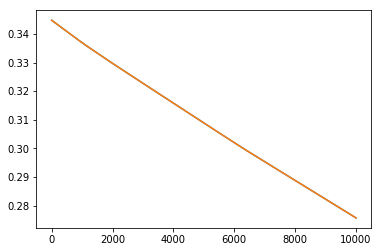

In [22]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [48]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [49]:
print (rmse_a[-1])

4.77874e-05
